# Preamble

In [2]:
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt

In [3]:
# Whether or not to save matplotlib figures as pdf output file for latex
USE_LATEX_ENGINE = True

if USE_LATEX_ENGINE:
    import matplotlib
    # matplotlib.use("pgf")     # pgf doesn't work for some plots because they exceed the max value that pgf can calculate
    matplotlib.rcParams.update({
        # "pgf.texsystem": "pdflatex",
        # 'pgf.rcfonts': False,
        'font.family': 'serif',
        'text.usetex': True,
    })

# Function Definitions

In [4]:
def _generate_output_string(element, data):
    """
    Returns a string that contains information about the percentual share of a value in a list
    """
    # if not isinstance(element, str): # make sure element is of type string, convert otherwise
    #     element = str(element)
    
    n_total = len(data)
    bool_list = (data == element)
    n_elements = sum(bool_list)

    return "{:<30}".format(str(n_elements) + '/' + str(n_total) + ' (' + "{:.2f}".format(((n_elements / n_total) * 100)) + '%)')

In [5]:
def calculate_percentages(normal_data, pneumonia_data, additional_df=None):
    """
    checks if two lists contain the same set of values - returns a warning if the sets dont match - prints a string with information about the distribution if they match
    """
    if len(set(normal_data)) is not len(set(pneumonia_data)):
        print('WARNING! Categories of healthy and pneumonia data are not identical!')
        print('Normal: ' + str(set(normal_data)))
        print('Pneumonia: ' + str(set(pneumonia_data)))
        print('Number of appearences (normal):')
        n_normal_set = ''
        for category in set(normal_data):
            n_normal_set += "'" + str(category) + "': " + str(sum(normal_data == category)) + '\n'   # single quote: non-escaped string, double quote: escaped string
        print(n_normal_set)
        return
    else:
        print(set(normal_data))
    if additional_df is None:
        print('{:<21}'.format('') + '{:<30}'.format('normal') + '{:<30}'.format('pneumonia'))
    else:
        print('{:<21}'.format('') + '{:<30}'.format('normal (total)') + '{:<30}'.format('normal (filtered)') + '{:<30}'.format('pneumonia'))

    for element in set(normal_data):
        category_string = "{:<21}".format(str(element) + ': ')
        if additional_df is None:
            print(category_string + _generate_output_string(element, normal_data) + _generate_output_string(element, pneumonia_data))
        else:
            print(category_string + _generate_output_string(element, normal_data) + _generate_output_string(element, additional_df) + _generate_output_string(element, pneumonia_data))

In [6]:
def find_appearences(df, column, value):
    """
    searches for appearences of a specified value within the column of a dataframe - prints the number of appearences and the corresponding indexes
    """
    
    value = str(value)
    print('found ' + str(sum(df[column] == value)) + ' rows')
    index_list = df.index[df[column] == value].tolist()
    print('Indexes: ' + str(index_list))
    return index_list

In [7]:
def drop_from_column(df, column, value, convert_to_string=True):
    """
    searches for appearences of a specified value within a column of a dataframe - drops each row where the value appeared from the dataframe
    """
    if convert_to_string:
        value = str(value)
    print('Dropping ' + str(sum(df[column] == value)) + ' rows')
    index_list = df.index[df[column] == value].tolist()
    df.drop(index_list, inplace=True)

# Data preparation

In [8]:
path_chexpert = '/mnt/f/05_DatensaetzeJan/CheXpert/CheXpert-v1.0/'
file_name_meta_data_train = 'train.csv'
file_name_meta_data_valid = 'valid.csv'

meta_data_train = pd.read_csv(path_chexpert + file_name_meta_data_train)
meta_data_valid = pd.read_csv(path_chexpert + file_name_meta_data_valid)

meta_data_train.reset_index(drop=True, inplace=True)
meta_data_valid.reset_index(drop=True, inplace=True)

meta_data = meta_data_train.append(meta_data_valid)
meta_data.reset_index(drop=True, inplace=True)

print('length of train is', len(meta_data_train))
print('length of valid is', len(meta_data_valid))
print('combined length:', len(meta_data))


length of train is 223414
length of valid is 234
combined length: 223648


In [9]:
len(meta_data.columns)

19

In [10]:
print('Labels are confidently present (1), confidently absent (0), uncertainly present (u) or not mentioned (blank)\n')
print('Description of columns:')
set(meta_data)

Labels are confidently present (1), confidently absent (0), uncertainly present (u) or not mentioned (blank)

Description of columns:


{'AP/PA',
 'Age',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Frontal/Lateral',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Path',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Sex',
 'Support Devices'}

In [11]:
# replacing nan with 'nan'
meta_data.fillna('nan', inplace=True)
meta_data.rename(columns={"Frontal/Lateral": "FrontalLateral", "AP/PA": "APPA", "Support Devices": "SupportDevices"}, errors='raise', inplace=True)

=== 1 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient55614/study1/view1_frontal.jpg', 'Female', 40, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', -1.0, -1.0, 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 1.0)


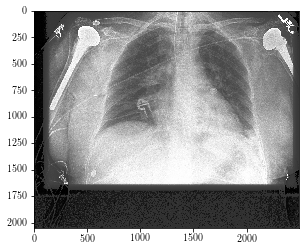



=== 2 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient07837/study6/view1_frontal.jpg', 'Male', 21, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', 'nan', 'nan', 1.0)
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 1.0)


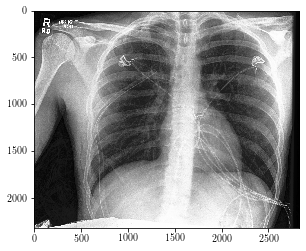



=== 3 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient23734/study7/view1_frontal.jpg', 'Female', 78, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
(1.0, 'nan', 'nan', 'nan')


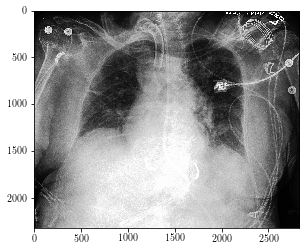



=== 4 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient39315/study5/view1_frontal.jpg', 'Female', 75, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', -1.0, 'nan', 1.0, 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', 'nan', 'nan', 0.0)
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
(0.0, 'nan', 'nan', 1.0)


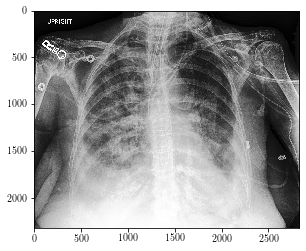



=== 5 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient15964/study16/view1_frontal.jpg', 'Male', 23, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 1.0, 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
(1.0, 'nan', 'nan', 1.0)


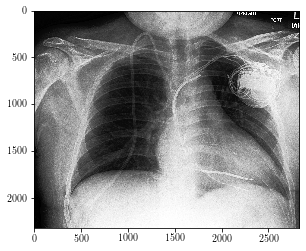



=== 6 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient22989/study2/view1_frontal.jpg', 'Male', 76, 'Frontal', 'PA')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
(1.0, 'nan', 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
(0.0, 'nan', 'nan', 'nan', 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 'nan')


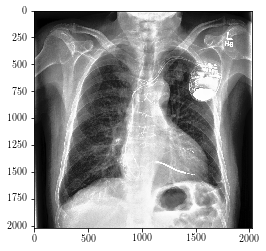



=== 7 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient13426/study7/view1_frontal.jpg', 'Male', 88, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', -1.0, 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', 'nan', 'nan', 0.0)
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 'nan')


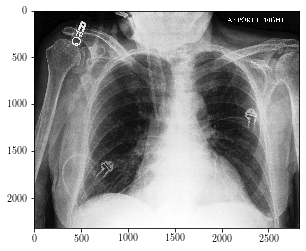



=== 8 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient10917/study6/view1_frontal.jpg', 'Male', 84, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 'nan', 'nan', 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
(1.0, 'nan', 'nan', 'nan', 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 'nan')


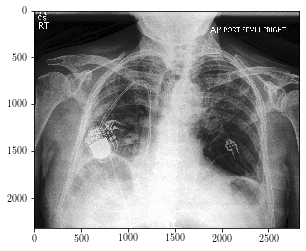



=== 9 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient29108/study2/view1_frontal.jpg', 'Female', 79, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 'nan', 'nan', 1.0, 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 0.0, 'nan', 1.0, 'nan')
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
('nan', 'nan', 'nan', 'nan')


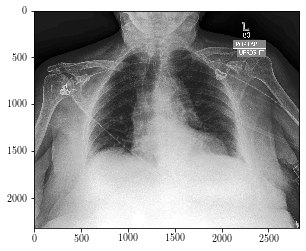



=== 10 sample ===
Index(['Path', 'Sex', 'Age', 'FrontalLateral', 'APPA'], dtype='object')
('CheXpert-v1.0/train/patient23797/study1/view1_frontal.jpg', 'Female', 90, 'Frontal', 'AP')
Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion'],
      dtype='object')
('nan', 1.0, 'nan', 1.0, 'nan')
Index(['Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax'], dtype='object')
('nan', 'nan', -1.0, -1.0, 0.0)
Index(['Pleural Effusion', 'Pleural Other', 'Fracture', 'SupportDevices'], dtype='object')
(1.0, 'nan', 'nan', 'nan')


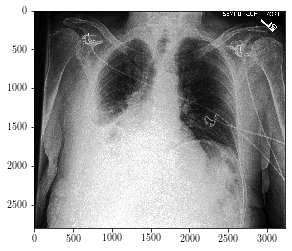

In [12]:
import matplotlib.image as mpimg

num = 0
for sample in meta_data.sample(n=10).itertuples():
    num = num + 1
    print('===', num, 'sample ===')
    step = 5
    for i in range(0,len(meta_data.columns),5):
        print(meta_data.columns[i:i+step])    
        print(sample[i+1:i+step+1])

    plt.figure(num)
    img = mpimg.imread('/mnt/f/05_DatensaetzeJan/CheXpert/' + sample.Path)
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()
    
    print('\n')



In [13]:
# remove images with lateral perspective
drop_from_column(meta_data, 'FrontalLateral', 'Lateral')

Dropping 32419 rows


In [14]:
meta_data['PatientID'] = meta_data.Path.str.slice(start=27, stop=32)
meta_data.sample(n=10).PatientID

134300    32216
191173    45961
173356    40472
107209    25746
100499    24175
100956    24267
87533     21019
209432    54728
44204     10800
139893    33605
Name: PatientID, dtype: object

In [15]:
pneumonia_meta_data = meta_data.query('Pneumonia == 1.0')
print('Pneumonia samples', len(pneumonia_meta_data)) # this is more than what the paper says it should be, maybe there are some minor differences to the actual data
normal_meta_data = meta_data.query('Pneumonia == 0.0 | Pneumonia == "nan"')
print('Remaining samples', len(normal_meta_data))

Pneumonia samples 4683
Remaining samples 170565


In [16]:
len(set(normal_meta_data))


20

In [17]:
pneumonia_patientids = set(pneumonia_meta_data['PatientID'])
normal_patientids = set(normal_meta_data['PatientID'])

duplicate_ids = pneumonia_patientids.intersection(normal_patientids)
print(len(duplicate_ids), 'of', len(pneumonia_patientids), 'pneumonia patients are also present in normal patients (total of', len(normal_patientids), 'unique normal patients)')

res = normal_meta_data[normal_meta_data['PatientID'].apply(lambda x: x in duplicate_ids)]
print('This affects', len(res), 'of', len(normal_meta_data), 'normal samples')

2663 of 3935 pneumonia patients are also present in normal patients (total of 60418 unique normal patients)
This affects 17639 of 170565 normal samples


In [18]:
# Dropping duplicates in normal data
normal_meta_data.drop(res.index, inplace=True)

In [19]:
mask = pd.to_numeric(meta_data['Age'], errors='coerce').isna()
print('Age information of', sum(mask), 'samples is missing')

Age information of 0 samples is missing


In [20]:
# FIRST_GROUP_BOUNDARY = 12
# SECOND_GROUP_BOUNDARY = 62

# drop_from_column(normal_meta_data, 'PatientBirth', 'U') # drop unknown birth years, since there's only one entry

# # This is clearly not the fastest way to do this, as using df.loc in loops is not recommended
# for df in [normal_meta_data, pneumonia_meta_data]:
#     i = 0
#     for row in df.itertuples():
#         age = int(str(row.StudyDate_DICOM)[:4]) - int(row.PatientBirth)
#         df.loc[row.Index, 'Age'] = age

#         if 0 <= age <= FIRST_GROUP_BOUNDARY:
#             df.loc[row.Index, 'AgeGroup'] = int(1)
#         elif FIRST_GROUP_BOUNDARY < age <= SECOND_GROUP_BOUNDARY:
#             df.loc[row.Index, 'AgeGroup'] = int(2)
#         elif SECOND_GROUP_BOUNDARY < age:
#             df.loc[row.Index, 'AgeGroup'] = int(3)
#         else:
#             raise ValueError("Calculated age was either below 0 or a non numerical type")

#         if str(row.Projection) == 'AP_horizontal':
#             i += 1
#             df.loc[row.Index, 'ProjectionSimplified'] = 'AP'
#         else:
#             df.loc[row.Index, 'ProjectionSimplified'] = row.Projection
#     print('Replaced AP_horizontal with AP', i, 'times')


# Data Analysis

In [21]:
print('==== Distribution of projections ====\n')
calculate_percentages(normal_meta_data['APPA'], pneumonia_meta_data['APPA'])

# dropping 'RL' and 'LL' as their number is irrelevant
drop_from_column(normal_meta_data, 'APPA', 'RL')
drop_from_column(normal_meta_data, 'APPA', 'LL')
drop_from_column(pneumonia_meta_data, 'APPA', 'LL')

calculate_percentages(normal_meta_data['APPA'], pneumonia_meta_data['APPA'])

==== Distribution of projections ====

WARNING! Categories of healthy and pneumonia data are not identical!
Normal: {'RL', 'LL', 'AP', 'PA'}
Pneumonia: {'LL', 'AP', 'PA'}
Number of appearences (normal):
'RL': 1
'LL': 12
'AP': 128818
'PA': 24095

Dropping 1 rows
Dropping 12 rows
Dropping 1 rows
{'AP', 'PA'}
                     normal                        pneumonia                     
AP:                  128818/152913 (84.24%)        3484/4682 (74.41%)            
PA:                  24095/152913 (15.76%)         1198/4682 (25.59%)            


In [22]:
print('==== Distribution of Frontal/Lateral ====\n')
calculate_percentages(normal_meta_data['FrontalLateral'], pneumonia_meta_data['FrontalLateral'])

==== Distribution of Frontal/Lateral ====

{'Frontal'}
                     normal                        pneumonia                     
Frontal:             152913/152913 (100.00%)       4682/4682 (100.00%)           


In [23]:
print('==== Distribution of Patient Sex ====\n')
calculate_percentages(normal_meta_data['Sex'], pneumonia_meta_data['Sex'])

drop_from_column(normal_meta_data, 'Sex', 'Unknown')

calculate_percentages(normal_meta_data['Sex'], pneumonia_meta_data['Sex'])


==== Distribution of Patient Sex ====

WARNING! Categories of healthy and pneumonia data are not identical!
Normal: {'Female', 'Male', 'Unknown'}
Pneumonia: {'Female', 'Male'}
Number of appearences (normal):
'Female': 63235
'Male': 89677
'Unknown': 1

Dropping 1 rows
{'Female', 'Male'}
                     normal                        pneumonia                     
Female:              63235/152912 (41.35%)         1950/4682 (41.65%)            
Male:                89677/152912 (58.65%)         2732/4682 (58.35%)            


In [24]:
calculate_percentages(normal_meta_data['SupportDevices'], pneumonia_meta_data['SupportDevices'])

{0.0, 1.0, 'nan', -1.0}
                     normal                        pneumonia                     
0.0:                 4636/152912 (3.03%)           82/4682 (1.75%)               
1.0:                 86883/152912 (56.82%)         1585/4682 (33.85%)            
nan:                 60643/152912 (39.66%)         3003/4682 (64.14%)            
-1.0:                750/152912 (0.49%)            12/4682 (0.26%)               


In [25]:
# It is not clear what -1.0 means, since it's not mentioned in the documentation. Removing these samples since there's only a small number
drop_from_column(normal_meta_data, 'SupportDevices', -1.0, False)
drop_from_column(pneumonia_meta_data, 'SupportDevices', -1.0, False)

Dropping 750 rows
Dropping 12 rows


In [26]:
calculate_percentages(normal_meta_data['Age'], pneumonia_meta_data['Age'])

WARNING! Categories of healthy and pneumonia data are not identical!
Normal: {0, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Pneumonia: {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Number of appearences (normal):
'0': 2
'18': 550
'19': 847
'20': 873
'21': 943
'22': 982
'23': 878
'24': 965
'25': 909
'26': 903
'27': 973
'28': 887
'29': 893
'30': 1085
'31': 981
'32': 864
'33': 967
'34': 944
'35': 1085
'36': 1005
'37': 1229
'38': 1269
'39': 1252
'40': 1328
'41': 1179
'42': 1507
'43': 1577
'44': 1733
'45

In [27]:
print(normal_meta_data[normal_meta_data['Age'] == 0].Path)
# After manual review, the two images are really from 0 year old patients. The image quality is not good and chances are high that these two are outliners anyway

223411    CheXpert-v1.0/train/patient64538/study1/view1_...
223413    CheXpert-v1.0/train/patient64540/study1/view1_...
Name: Path, dtype: object


In [28]:
drop_from_column(normal_meta_data, 'Age', 0, False)
calculate_percentages(normal_meta_data['Age'], pneumonia_meta_data['Age'])

Dropping 2 rows
{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
                     normal                        pneumonia                     
18:                  550/152160 (0.36%)            29/4670 (0.62%)               
19:                  847/152160 (0.56%)            24/4670 (0.51%)               
20:                  873/152160 (0.57%)            30/4670 (0.64%)               
21:                  943/152160 (0.62%)            22/4670 (0.47%)               
22:                  982/152160 (0.65%)            26/4670 (0.56%)               
23:                  878/152160 (0.58%)            19/4670 (0.41%)               
24:                  965/152160 (0.63%)            25/4670 (0.54%)               
25:                  909/152160 (0.

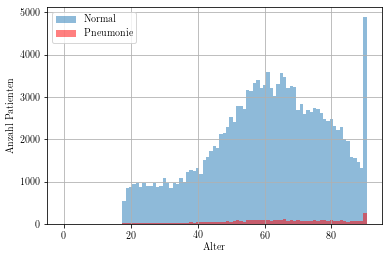

In [29]:
maximum_age = max(max(set(normal_meta_data['Age'])), max(set(pneumonia_meta_data['Age'])))
x_axis_age = np.arange(maximum_age + 2)-0.5 # would be +1 for right aligned, but we want to center the x ticks -> +0.5
plt.hist(normal_meta_data['Age'], x_axis_age, alpha=0.5, label="Normal")
plt.hist(pneumonia_meta_data['Age'], x_axis_age, alpha=0.5, color='r', label="Pneumonie")
plt.ylabel('Anzahl Patienten')
plt.xlabel('Alter')
plt.legend()
plt.grid(True)
# plt.show()

if USE_LATEX_ENGINE:
    plt.savefig('/mnt/c/Users/Jan/Daten/Dropbox/Master/3_Semester/Masterarbeit/Latex/python_output/chexpert_age_histogram.pdf')


# Stratified Sampling from Kaggle

In [30]:
'''
This module contains functions that computes stratified sampling of pandas dataframes.
'''
# Required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Functions

In [31]:
def __smpl_size(population, size):
    '''
    A function to compute the sample size. If not informed, a sampling 
    size will be calculated using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2

        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error

        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)

        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Parameters
    ----------
        :population: population size
        :size: sample size (default = None)
    Returns
    -------
    Calculated sample size to be used in the functions:
        - stratified_sample
        - stratified_sample_report
    '''
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [32]:
def stratified_sample_report(df, strata, size=None):
    '''
    Generates a dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.

    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2

        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error

        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)

        where:
            - cochran_n = result of the previous formula
            - N is the population size

    Returns
    -------
    A dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd

In [33]:
def stratified_sample_transferred(df_target, df_proportion, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df_target: pandas dataframe from which data will be sampled.
    :df_proportion: pandas dataframe from which the proportions for sampling will be used.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    
    # population = len(df)
    # size = __smpl_size(population, size)
    # tmp = df[strata]
    # tmp['size'] = 1
    # tmp_grpd = tmp.groupby(strata).count().reset_index()
    # tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)


    population = len(df_proportion)
    size = __smpl_size(population, size)

    tmp_proportion = df_proportion[strata]
    tmp = df_target[strata]

    tmp_proportion['size'] = 1
    tmp['size'] = 1

    tmp_proportion_grpd = tmp_proportion.groupby(strata).count().reset_index()
    tmp_grpd = tmp.groupby(strata).count().reset_index()

    if not tmp_grpd[strata].equals(tmp_proportion_grpd[strata]):
        print(tmp_grpd)
        print(tmp_proportion_grpd)
        raise ValueError("Dataframes don't have the same groups for the given set of stratas. You can check the differences in the terminal output.")        

    tmp_proportion_grpd['samp_size'] = round(size/population * tmp_proportion_grpd['size']).astype(int)
    tmp_grpd['samp_size'] = round(size/population * tmp_proportion_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True
    # Hier muss nichts geändert werden, da die Gruppen ohnehin die gleichen sein sollten -> len(tmp_grpd) == len(tmp_proportion_grpd)
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            # Hier wird n berechnet, tmp_proportion_grpd statt tmp_grpd
            
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # query dataframe
        queried_df = df_target.query(qry)

        # check if result contains enough samples / rows
        if len(queried_df) < n:
            print("Warning! The required number of samples (" + str(n) + ") could not be retrieved.")
            print("Using all available entries (" + str(len(queried_df)) + ") of group:")
            print(qry)
            n = len(queried_df)

        # sample dataframe
        sampled_df = queried_df.sample(n=n, random_state=seed).reset_index(drop=(not keep_index))

        # assign to final dataframe
        if first:
            stratified_df = sampled_df
            first = False
        else:
            stratified_df = stratified_df.append(sampled_df, ignore_index=True)
    
    return stratified_df

In [34]:
set(normal_meta_data)

{'APPA',
 'Age',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'FrontalLateral',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Path',
 'PatientID',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Sex',
 'SupportDevices'}

In [35]:
set(normal_meta_data['SupportDevices'])

{0.0, 1.0, 'nan'}

In [36]:
filtered_df = stratified_sample_transferred(normal_meta_data, pneumonia_meta_data, ['Sex', 'APPA', 'SupportDevices'], size=len(pneumonia_meta_data))

print('\nFiltered dataframe has', len(filtered_df), 'samples')


Filtered dataframe has 4670 samples


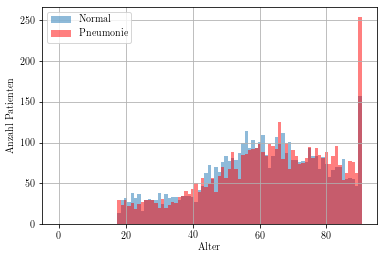

In [37]:
maximum_age = max(max(set(filtered_df['Age'])), max(set(pneumonia_meta_data['Age'])))
x_axis_age = np.arange(maximum_age + 2)-0.5 # would be +1 for right aligned, but we want to center the x ticks -> +0.5

plt.hist(filtered_df['Age'], x_axis_age, alpha=0.5, label="Normal")
plt.hist(pneumonia_meta_data['Age'], x_axis_age, alpha=0.5, color='r', label="Pneumonie")
plt.ylabel('Anzahl Patienten')
plt.xlabel('Alter')
plt.legend()
plt.grid(True)

if USE_LATEX_ENGINE:
    plt.savefig('/mnt/c/Users/Jan/Daten/Dropbox/Master/3_Semester/Masterarbeit/Latex/python_output/chexpert_age_histogram_no_groups.pdf')

In [38]:
total_error = 0
for age in np.arange(max(max(filtered_df['Age']), max(pneumonia_meta_data['Age']))):
    error = abs(list(filtered_df['Age']).count(age) - list(pneumonia_meta_data['Age']).count(age))
    # print(error)
    total_error += error
print('Total error was:', total_error)

Total error was: 847


In [39]:
calculate_percentages(normal_meta_data['APPA'], pneumonia_meta_data['APPA'], filtered_df['APPA'])
calculate_percentages(normal_meta_data['Sex'], pneumonia_meta_data['Sex'], filtered_df['Sex'])
calculate_percentages(normal_meta_data['SupportDevices'], pneumonia_meta_data['SupportDevices'], filtered_df['SupportDevices'])

{'AP', 'PA'}
                     normal (total)                normal (filtered)             pneumonia                     
AP:                  128200/152160 (84.25%)        3473/4670 (74.37%)            3473/4670 (74.37%)            
PA:                  23960/152160 (15.75%)         1197/4670 (25.63%)            1197/4670 (25.63%)            
{'Female', 'Male'}
                     normal (total)                normal (filtered)             pneumonia                     
Female:              62997/152160 (41.40%)         1943/4670 (41.61%)            1943/4670 (41.61%)            
Male:                89163/152160 (58.60%)         2727/4670 (58.39%)            2727/4670 (58.39%)            
{0.0, 1.0, 'nan'}
                     normal (total)                normal (filtered)             pneumonia                     
0.0:                 4636/152160 (3.05%)           82/4670 (1.76%)               82/4670 (1.76%)               
1.0:                 86883/152160 (57.10%)         158

In [40]:
pneumonia_patientids = set(pneumonia_meta_data['PatientID'])
filtered_patientids = set(filtered_df['PatientID'])

duplicate_ids = pneumonia_patientids.intersection(filtered_patientids)
print(len(duplicate_ids), 'of', len(pneumonia_patientids), 'pneumonia patients are also present in normal patients (total of', len(filtered_patientids), 'unique normal patients)')

filtered_res = filtered_df[filtered_df['PatientID'].apply(lambda x: x in duplicate_ids)]
print('This affects', len(filtered_res), 'of', len(filtered_df), 'normal samples')

0 of 3923 pneumonia patients are also present in normal patients (total of 4358 unique normal patients)
This affects 0 of 4670 normal samples


# Store results as csv files

In [41]:
filtered_df.to_csv('./normal_meta_data_filtered.csv')
pneumonia_meta_data.to_csv('./pneumonia_meta_data_filtered.csv')